基於data.csv數據，建立mlp模型，計算其在測試數據上的準確率，可視化模型預測結果:
1. 進行數據分離: test_size=0.33,random_state=10
2. 模型結構: 一層隱藏層, 有20個神經元

In [2]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('mlp_data.csv')
data.head()

,x1,x2,y
0,0.0323,0.0244,1
1,0.0887,0.0244,1
2,0.1690,0.0163,1
3,0.2420,0.0000,1
4,0.2420,0.0488,1


In [3]:
#define the X and y
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']
X.head()

,x1,x2
0,0.0323,0.0244
1,0.0887,0.0244
2,0.1690,0.0163
3,0.2420,0.0000
4,0.2420,0.0488


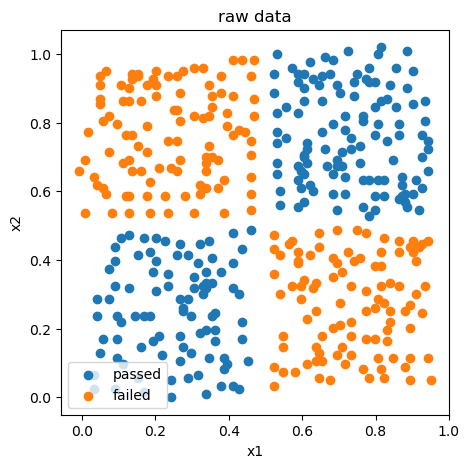

In [4]:
#visualize the data
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
passed = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
failed = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
plt.legend((passed,failed),('passed','failed'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
plt.show()

In [5]:
#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=10)
print(X_train.shape, X_test.shape, X.shape)

(275, 2) (136, 2) (411, 2)


In [6]:
#set up the model
from keras.models import Sequential
from keras.layers import Dense,Activation

mlp = Sequential()
mlp.add(Dense(units=20, input_dim=2, activation='sigmoid')) # units:隱藏層有20個神經元，input_dim：一開始輸入維度有x1 x2兩個
mlp.add(Dense(units=1, activation='sigmoid'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [7]:
#compile the model
mlp.compile(optimizer='adam',loss='binary_crossentropy') # optimizer:優化方法, loss:損失函數

In [8]:
#train the model
mlp.fit(X_train,y_train,epochs=3000) # 可以發現損失函數越來越小

Epoch 1/3000
9/9 [==============================] - 1s 2ms/step - loss: 0.6974
Epoch 2/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6953
Epoch 3/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 4/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6928
Epoch 5/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6924
Epoch 6/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6924
Epoch 7/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6924
Epoch 8/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6924
Epoch 9/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6923
Epoch 10/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6924
Epoch 11/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6922
Epoch 12/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6923
Epoch 13/3000
9/9 [==============================

9/9 [==============================] - 0s 1ms/step - loss: 0.6903
Epoch 104/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6903
Epoch 105/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6903
Epoch 106/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6903
Epoch 107/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6908
Epoch 108/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6904
Epoch 109/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6902
Epoch 110/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6903
Epoch 111/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6902
Epoch 112/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6904
Epoch 113/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6904
Epoch 114/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6902
Epoch 115/3000
9/9 [=======================

9/9 [==============================] - 0s 1ms/step - loss: 0.6897
Epoch 205/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6895
Epoch 206/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6899
Epoch 207/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6895
Epoch 208/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6896
Epoch 209/3000
9/9 [==============================] - 0s 1000us/step - loss: 0.6896
Epoch 210/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6896
Epoch 211/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6895
Epoch 212/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6896
Epoch 213/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6900
Epoch 214/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6897
Epoch 215/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6896
Epoch 216/3000
9/9 [====================

9/9 [==============================] - 0s 1ms/step - loss: 0.6892
Epoch 306/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6892
Epoch 307/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6892
Epoch 308/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6893
Epoch 309/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6895
Epoch 310/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6893
Epoch 311/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6892
Epoch 312/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6893
Epoch 313/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6892
Epoch 314/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6891
Epoch 315/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6893
Epoch 316/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6892
Epoch 317/3000
9/9 [=======================

9/9 [==============================] - 0s 1ms/step - loss: 0.6891
Epoch 407/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6890
Epoch 408/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6892
Epoch 409/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6890
Epoch 410/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6891
Epoch 411/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6892
Epoch 412/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6890
Epoch 413/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6889
Epoch 414/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6893
Epoch 415/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6891
Epoch 416/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6891
Epoch 417/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6890
Epoch 418/3000
9/9 [=======================

9/9 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 508/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 509/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6892
Epoch 510/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6892
Epoch 511/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6889
Epoch 512/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6890
Epoch 513/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6891
Epoch 514/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 515/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 516/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 517/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6891
Epoch 518/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6889
Epoch 519/3000
9/9 [=======================

9/9 [==============================] - 0s 1ms/step - loss: 0.6887
Epoch 609/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6887
Epoch 610/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6887
Epoch 611/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 612/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6887
Epoch 613/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6887
Epoch 614/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 615/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 616/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6887
Epoch 617/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 618/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 619/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6886
Epoch 620/3000
9/9 [=======================

9/9 [==============================] - 0s 1ms/step - loss: 0.6885
Epoch 710/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6885
Epoch 711/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6885
Epoch 712/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6885
Epoch 713/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6885
Epoch 714/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 715/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6888
Epoch 716/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6889
Epoch 717/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6884
Epoch 718/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6884
Epoch 719/3000
9/9 [==============================] - 0s 1000us/step - loss: 0.6888
Epoch 720/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6885
Epoch 721/3000
9/9 [====================

9/9 [==============================] - 0s 2ms/step - loss: 0.6885
Epoch 811/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6884
Epoch 812/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6887
Epoch 813/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6883
Epoch 814/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6885
Epoch 815/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6883
Epoch 816/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6884
Epoch 817/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6883
Epoch 818/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6883
Epoch 819/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6885
Epoch 820/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6882
Epoch 821/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6883
Epoch 822/3000
9/9 [=======================

9/9 [==============================] - 0s 1ms/step - loss: 0.6879
Epoch 912/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6879
Epoch 913/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6879
Epoch 914/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6881
Epoch 915/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6881
Epoch 916/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6880
Epoch 917/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6879
Epoch 918/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6880
Epoch 919/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6879
Epoch 920/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6880
Epoch 921/3000
9/9 [==============================] - 0s 1000us/step - loss: 0.6883
Epoch 922/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6880
Epoch 923/3000
9/9 [====================

9/9 [==============================] - 0s 1ms/step - loss: 0.6874
Epoch 1013/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6876
Epoch 1014/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6875
Epoch 1015/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6873
Epoch 1016/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6873
Epoch 1017/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6874
Epoch 1018/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6872
Epoch 1019/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6881
Epoch 1020/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6872
Epoch 1021/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6873
Epoch 1022/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6872
Epoch 1023/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6874
Epoch 1024/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.6858
Epoch 1113/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6858
Epoch 1114/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6858
Epoch 1115/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.6860
Epoch 1116/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6862
Epoch 1117/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6860
Epoch 1118/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6857
Epoch 1119/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6858
Epoch 1120/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6858
Epoch 1121/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6857
Epoch 1122/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6858
Epoch 1123/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6859
Epoch 1124/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.6829
Epoch 1213/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6828
Epoch 1214/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6828
Epoch 1215/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6826
Epoch 1216/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6830
Epoch 1217/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6827
Epoch 1218/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6825
Epoch 1219/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6826
Epoch 1220/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6824
Epoch 1221/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6823
Epoch 1222/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6823
Epoch 1223/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6822
Epoch 1224/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.6765
Epoch 1313/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6763
Epoch 1314/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6761
Epoch 1315/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6761
Epoch 1316/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6760
Epoch 1317/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6765
Epoch 1318/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6758
Epoch 1319/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6757
Epoch 1320/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6756
Epoch 1321/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6755
Epoch 1322/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6755
Epoch 1323/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6753
Epoch 1324/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.6654
Epoch 1413/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6652
Epoch 1414/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6653
Epoch 1415/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6652
Epoch 1416/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6648
Epoch 1417/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6646
Epoch 1418/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6645
Epoch 1419/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6647
Epoch 1420/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6643
Epoch 1421/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6641
Epoch 1422/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6641
Epoch 1423/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6640
Epoch 1424/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.6485
Epoch 1513/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6484
Epoch 1514/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6486
Epoch 1515/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6478
Epoch 1516/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6481
Epoch 1517/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6478
Epoch 1518/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6474
Epoch 1519/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6471
Epoch 1520/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6469
Epoch 1521/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6468
Epoch 1522/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6466
Epoch 1523/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6462
Epoch 1524/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.6255
Epoch 1613/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6251
Epoch 1614/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6248
Epoch 1615/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6247
Epoch 1616/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6245
Epoch 1617/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6241
Epoch 1618/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6238
Epoch 1619/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6237
Epoch 1620/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6233
Epoch 1621/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6230
Epoch 1622/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6227
Epoch 1623/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.6225
Epoch 1624/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.5974
Epoch 1713/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5973
Epoch 1714/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5967
Epoch 1715/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5966
Epoch 1716/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5962
Epoch 1717/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5957
Epoch 1718/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5955
Epoch 1719/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5952
Epoch 1720/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5949
Epoch 1721/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5945
Epoch 1722/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5942
Epoch 1723/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5941
Epoch 1724/3000
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.5647
Epoch 1813/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5644
Epoch 1814/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5642
Epoch 1815/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5638
Epoch 1816/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5635
Epoch 1817/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5634
Epoch 1818/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5628
Epoch 1819/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5625
Epoch 1820/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5624
Epoch 1821/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5617
Epoch 1822/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5613
Epoch 1823/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5612
Epoch 1824/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.5298
Epoch 1913/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5295
Epoch 1914/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5289
Epoch 1915/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5290
Epoch 1916/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5285
Epoch 1917/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5278
Epoch 1918/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5276
Epoch 1919/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5272
Epoch 1920/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5267
Epoch 1921/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5265
Epoch 1922/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5261
Epoch 1923/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.5258
Epoch 1924/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.4951
Epoch 2013/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4947
Epoch 2014/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4945
Epoch 2015/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4940
Epoch 2016/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4938
Epoch 2017/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4945
Epoch 2018/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4932
Epoch 2019/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4927
Epoch 2020/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4925
Epoch 2021/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4922
Epoch 2022/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4916
Epoch 2023/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4913
Epoch 2024/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.4623
Epoch 2113/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4622
Epoch 2114/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4617
Epoch 2115/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4617
Epoch 2116/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4609
Epoch 2117/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4608
Epoch 2118/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4605
Epoch 2119/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4604
Epoch 2120/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4601
Epoch 2121/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4595
Epoch 2122/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4596
Epoch 2123/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4592
Epoch 2124/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.4317
Epoch 2213/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4313
Epoch 2214/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4311
Epoch 2215/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4312
Epoch 2216/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4304
Epoch 2217/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4302
Epoch 2218/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4299
Epoch 2219/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4296
Epoch 2220/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4294
Epoch 2221/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4291
Epoch 2222/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4289
Epoch 2223/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4285
Epoch 2224/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.4033
Epoch 2313/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4030
Epoch 2314/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4028
Epoch 2315/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4025
Epoch 2316/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4022
Epoch 2317/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4020
Epoch 2318/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4016
Epoch 2319/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4016
Epoch 2320/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4011
Epoch 2321/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4009
Epoch 2322/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4011
Epoch 2323/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.4003
Epoch 2324/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.3773
Epoch 2413/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3771
Epoch 2414/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3768
Epoch 2415/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3768
Epoch 2416/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3765
Epoch 2417/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3760
Epoch 2418/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3761
Epoch 2419/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3759
Epoch 2420/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3755
Epoch 2421/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3752
Epoch 2422/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3748
Epoch 2423/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3746
Epoch 2424/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.3539
Epoch 2513/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3536
Epoch 2514/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3534
Epoch 2515/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3532
Epoch 2516/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3530
Epoch 2517/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3528
Epoch 2518/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3525
Epoch 2519/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3523
Epoch 2520/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3521
Epoch 2521/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3519
Epoch 2522/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3516
Epoch 2523/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3516
Epoch 2524/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.3328
Epoch 2613/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3323
Epoch 2614/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.3321
Epoch 2615/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3319
Epoch 2616/3000
9/9 [==============================] - 0s 2ms/step - loss: 0.3317
Epoch 2617/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3314
Epoch 2618/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3312
Epoch 2619/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3309
Epoch 2620/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3308
Epoch 2621/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3307
Epoch 2622/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3304
Epoch 2623/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3302
Epoch 2624/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.3131
Epoch 2713/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3128
Epoch 2714/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3126
Epoch 2715/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3125
Epoch 2716/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3126
Epoch 2717/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3121
Epoch 2718/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3120
Epoch 2719/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3117
Epoch 2720/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3117
Epoch 2721/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3116
Epoch 2722/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3113
Epoch 2723/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.3110
Epoch 2724/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.2958
Epoch 2813/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2955
Epoch 2814/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2953
Epoch 2815/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2952
Epoch 2816/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2951
Epoch 2817/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2949
Epoch 2818/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2947
Epoch 2819/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2945
Epoch 2820/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2944
Epoch 2821/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2942
Epoch 2822/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2940
Epoch 2823/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2938
Epoch 2824/3000
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.2800
Epoch 2913/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2795
Epoch 2914/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2796
Epoch 2915/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2798
Epoch 2916/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2795
Epoch 2917/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2791
Epoch 2918/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2794
Epoch 2919/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2787
Epoch 2920/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2786
Epoch 2921/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2784
Epoch 2922/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2783
Epoch 2923/3000
9/9 [==============================] - 0s 1ms/step - loss: 0.2783
Epoch 2924/3000
9/9 [===========

In [9]:
#make prediction and calculate the accuracy

# y_train_predict = mlp.predict_classes(X_train) # Tensorflow 2.6 版本，删除了predict_classes() 这个函数,2.6以上會報錯

# Tensorflow 2.6以上版本，網上大部分說使用這個辦法，但是我發現這樣概率很低不知道是什麽原因
# y_train_predict = mlp.predict(X_train)
# print(y_train_predict)
# y_train_predict=np.argmax(y_train_predict,axis=1)
# print(y_train_predict)

# 使用以下辦法np.around(mlp.predict())取代predict_classes()好像概率正常點
y_train_predict = np.around(mlp.predict(X_train))

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

9/9 [==============================] - 0s 1000us/step
0.9018181818181819


In [10]:
#make prediction based on the test data
y_test_predict = np.around(mlp.predict(X_test))

accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

5/5 [==============================] - 0s 1ms/step
0.9044117647058824


In [11]:
print(y_train_predict)
y_train_predict_form = pd.Series(i[0] for i in y_train_predict)
print(y_train_predict_form)

[[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.

In [12]:
# generate new data for plot
xx, yy = np.meshgrid(np.arange(0,1,0.01), np.arange(0,1,0.01))
x_range = np.c_[xx.ravel(), yy.ravel()]
y_range_predict = np.around(mlp.predict(x_range))
print(type(y_range_predict))

313/313 [==============================] - 0s 747us/step
<class 'numpy.ndarray'>


In [13]:
# format the output
y_range_predict_form = pd.Series(i[0] for i in y_range_predict)
print(y_range_predict_form)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9995    1.0
9996    1.0
9997    1.0
9998    1.0
9999    1.0
Length: 10000, dtype: float32


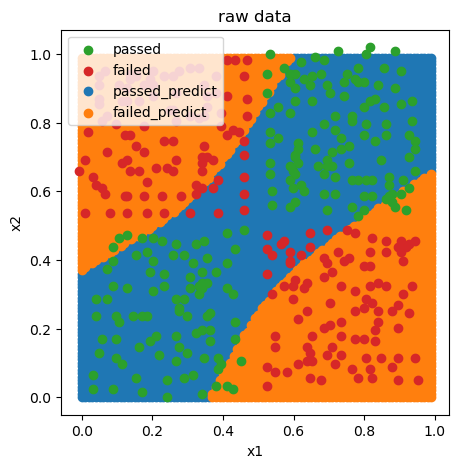

In [14]:
fig2 = plt.figure(figsize=(5,5))
passed_predict = plt.scatter(x_range[:,0][y_range_predict_form==1],x_range[:,1][y_range_predict_form==1])
failed_predict = plt.scatter(x_range[:,0][y_range_predict_form==0],x_range[:,1][y_range_predict_form==0])

passed = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
failed = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
plt.legend((passed,failed,passed_predict,failed_predict),('passed','failed','passed_predict','failed_predict'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
plt.show()

好壞質檢二分類mlp實戰summary:
1. 通過mlp模型，在不增加特徵項的情況下，實現了非綫性二分類任務
1. 掌握了mlp模型的建立、配置與訓練方法，並實現基於新數據的預測
1. 熟悉了mlp分類的預測數據格式，並實現格式轉換
1. 核心算法參考鏈接：https://keras-cn.readthedocs.io/en/latest/#30skeras
